In [31]:
from sklearn.datasets import load_diabetes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [32]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
X_lda = np.c_[np.ones(X_lda.shape[0]), X_lda]

model_smse = LinearRegression()
model_smae = LinearRegression()

model_smse.fit(X_lda, y)
model_smae.fit(X_lda, y)


LinearRegression()

In [44]:

def SMSE_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def SMAE_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def gradient_descent(X, y, learning_rate, num_iterations, loss_func):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features) 
    gradient = 0
    for i in range(num_iterations):
        
        y_pred = np.dot(X, weights)
        
        if loss_func == SMAE_loss:
            gradient = -1 * abs(np.dot(np.ones_like(y_pred), (y - y_pred))) / n_samples
        if loss_func == SMSE_loss:
            gradient = -2*np.dot((y - y_pred), X) / n_samples 
    
        weights -= learning_rate * gradient
    
    return weights

In [45]:
learning_rate = 0.01
num_iterations = 1000

weights_smse = gradient_descent(X_lda, y, learning_rate, num_iterations, loss_func=SMSE_loss)
weights_smae = gradient_descent(X_lda, y, learning_rate, num_iterations, loss_func=SMAE_loss)

a_smse, b_smse = weights_smse[1], weights_smse[0]
a_smae, b_smae = weights_smae[1], weights_smae[0]

print("Коэффициенты модели (SMSE):")
print("a =", a_smse)
print("b =", b_smse)

print("Коэффициенты модели (SMAE):")
print("a =", a_smae)
print("b =", b_smae)

y_pred_smse = np.dot(X_lda, weights_smse)
y_pred_smae = np.dot(X_lda, weights_smae)

y_pred_smse_builtin = model_smse.predict(X_lda)
y_pred_smae_builtin = model_smae.predict(X_lda)

SMSE = SMSE_loss(y, y_pred_smse)
SMAE = SMAE_loss(y, y_pred_smae)

SMSE_builtin = mean_squared_error(y, y_pred_smse_builtin)
SMAE_builtin = mean_absolute_error(y, y_pred_smae_builtin)

print("Значение функции потерь SMSE:", SMSE)
print("Значение функции потерь SMAE:", SMAE)

print("Значение функции потерь SMSE (встроенная):", SMSE_builtin)
print("Значение функции потерь SMAE (встроенная):", SMAE_builtin)

Коэффициенты модели (SMSE):
a = 37.82990044726529
b = 152.13348390686025
Коэффициенты модели (SMAE):
a = 152.1269163706117
b = 152.1269163706117
Значение функции потерь SMSE: 2962.894569822663
Значение функции потерь SMAE: 140.51906915938392
Значение функции потерь SMSE (встроенная): 2962.894569822663
Значение функции потерь SMAE (встроенная): 43.75505044354541


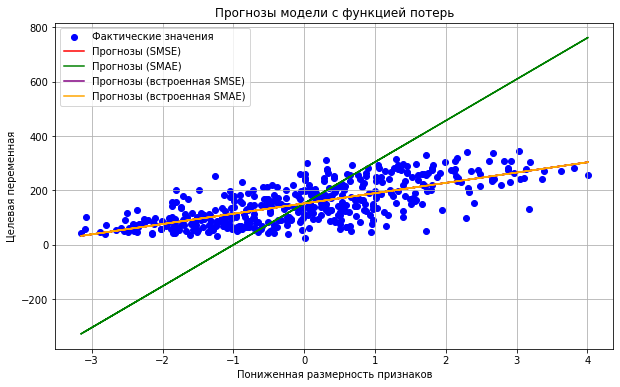

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 1], y, color='blue', label='Фактические значения')
plt.plot(X_lda[:, 1], y_pred_smse, color='red', label='Прогнозы (SMSE)')
plt.xlabel('Пониженная размерность признаков')
plt.ylabel('Целевая переменная')
plt.title('Прогнозы модели с функцией потерь')
plt.legend()
plt.grid(True)

plt.plot(X_lda[:, 1], y_pred_smae, color='green', label='Прогнозы (SMAE)')
plt.plot(X_lda[:, 1], y_pred_smse_builtin, color='purple', label='Прогнозы (встроенная SMSE)')
plt.plot(X_lda[:, 1], y_pred_smae_builtin, color='orange', label='Прогнозы (встроенная SMAE)')
plt.legend()
plt.grid(True)
plt.show()

Менее подвержен переобучению SMSE алгоритм, он же и эффективнее 

Задание 2

In [2]:
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    return text

In [15]:
data = {
    'Отрывок': ["Right now I'm shameless Screaming my lungs out for ya",
                "I live for the applause, applause, applause",
                "I can smell your scent for miles", 
                "Oh, she's sweet but a psycho",
                "I'm a mess, I'm a loser",
                "I, I love you like a love song, baby",
                "I'm headed straight for the castle",
                "Never break a sweat for the other guys",
                "And it's new, the shape of your body",
                "You're from a whole another world",
                "I wanna taste the crush",
                "I can buy myself flowers",
                "Kiss-kiss-kiss-kisses to my exes who don't give a shit about me",
                "I'm sorry, sorry that you just don't understand",
                "I've been feeling lonely, baby, you got what I need",
                "May be young for a teacher, I'll teach you what you don't know",
                "Into the dark, into the light, baby, I go",
                "Let's fast forward to three hundred takeout coffees later",
                "I should not be left to my own devices",
                "Like a girl changes clothes",
                "Hey, I just met you, and this is crazy", 
                "And still, you don't know me at all",
                "But even if the stars and moon collide",
                "If you wanted love like this, blowing up with every kiss",
                "Well, those great whites, they have big teeth",
                "If you want it, I'm gonna be", 
                "So baby, come light me up, and baby, I'll let you on it",
                "From sprinkler splashes to fireplace ashes",
                "I got the eye of the tiger, a fighter",
                "You said, Forever, and I almost bought it",
                "Romeo take me somewhere we can be alone",
                "Like a nightmare, terrorized"
                "I feel the rage, and I just can't hold it",
                "I need a hero to save me now",
                "You make me feel invincible",
                "It's our resistance, you can't resist us", 
                "I'm awake, I'm alive",
                "We're gonna stand and fight forever",
                "I don't wanna breathe",
                "Rise and Revolution",
                "When darkness comes, I'll light the night with stars",
                "My heart bleeds adrenaline",
                "Their dreams just keep dripping out of their golden cups",
                "There's a psycho in my head",
                "All I ever needed was a reason to believe",
                "Light it up, light it up, now I'm burning",
                "I came to fight for the love of the game, unstoppable",
                "I'm closer to the edge",
                "Every single day, I chase my own tail",
                "Falling in the black, slipping through the cracks",
                "Do you ever feel your colors are fading",
                "In all this loneliness and all this emptines",
                "You can try to defeat me",
                "Your parents say everything is your fault",
                "If You can hold the stars in place",
                "I don't wanna feel like this tomorrow",
                "When nothing is real, you are my truth",
                "I see the world around me start to darken",
                "Their dreams just keep drippin' out of their golden cups",
                "All the lies and stupid things you say and do, it's you",
                "Start the clock, it's humanity rewired",
                "And the voices tell you this might be the end when",
                "Killing me slow but I ain't ready to die",
                "Heaven coming down to the corners of the Earth",
                "I feel you keeping me alive",
                "From the fire that burns inside, consuming",
                "I'm afraid I'm gonna die down here",
                "Give me your best shot, the stronger I stand",
                "I wish I had an angel",
                "And we run for this killing love",
                "Shout it from the roof tops",
                "Dead siblings walking the dying Earth",
                "Here it comes, the story of mankind's final glory",
                "With the nunchucks doors and I'm pullin' up slow",
                "Everybody lookin' at me like I know the path to take",
                "Poppin' these bottles, touchin' these models",
                "I was at the top and now it's like I'm in the basement",
                "The voices in my head keep telling me I'm not okay",
                "Once all eyes is on me, floating off like South Paul",
                "I wanted the fame but not the cover of Newsweek",
                "Fancy when I drive, six cars in the driveway",
                "If you're mad well too bad, sounds like a personal issue",
                "Money's the motivation, money's the conversation",
                "Shake for a Sheikh, I'm throwing these Emirates in the sky",
                "Don't give a damn, dude, your girlfriend is a groupie",
                "But you won't take this thing out these words before I say 'em",
                "Rocks on the watch now, armageddon",
                "Gimme the ting and make me rock inna di dance",
                "I got the squad tatted on me from my neck to my ankles",
                "She took my heart and left me lonely",
                "I feel good, sometimes I don't, ayy, don't",
                "I woke up in a new Bugatti",
                "I wanna scream and shout and let it all out",
                "Cruise the city in a bulletproof Cadillac",
                "Reppin' my town, when you see me you know everything",
                "You've got the devil in your eyes",
                "I think about you more than 24 times",
                "You left me falling and landing inside my grave",
                "She saw my eyes, she know I'm gone",
                "How can we not talk about family when family's all that we got",
                "And tell me how you hate me, hate me, still tryna replace me",
                "Ladies order up the champagne, a whole lot of it",
                "You spend what you want and you get what you want",
                "Look, you cannot say Pop and forget the Smoke",
                "But I'll show you how the fuck you gotta do it",
                "I let my bitch roll my blunt",
                "Yamborghini chain, rest in peace to my superior",
                "Brand-new Lamborghini, fuck a cop car",
                "I take what's mine, then take some more",
                "And I've seen her get richer in the pole",
                "Like something you ride a sled down, I just want that head",
                "I hope you know that you can tell me whatever you're thinking",
                "'Cause I'm alone, you see",
                "You get in my way, I'ma feed you to the monster",
                "I'll face myself to cross out what I've become",
                "I've become so numb",
                "Watch the time go right out the window",
                "I wanna heal, I wanna feel what I thought was never real",
                "I am, what you never want to say, but I've never had a doubt",
                "There was nothing in sight",
                "I don't know what's worth fighting for",
                "Broken promises they made",
                "Looking for help somehow, somewhere",
                "As the flames climbed into the clouds",
                "Wish I could find a way to disappear",
                "The reminders pull the floor from your feet",
                "I bleed it out, digging deeper just to throw it away",
                "Every time I try to make myself get back up on my feet",
                "Remember condescending talk of who I ought to be",
                "I wish I'd held it in, so you never knew what built up inside of me",
                "While taking pleasure in the awful things you put me through",
                "Like we're holding onto something",
                "And when I close my eyes tonight",
                "Paper bags and angry voices, under a sky of dust",
                "Sometimes I feel like I trusted you too well",
                "Sometimes beginnings aren't so simple",
                "Even the people who never frown eventually break down",
                "And in a burst of light that blinded every angel",
                "To what I want when I'm stretched so thin",
                "So many people like me that put so much trust in all your lies",
                "There's a place so dark you can't see the end",
                "Lying with her hands across her chest",
                "Discomfort endlessly has pulled itself upon me",
                "But I know, yeah, I know, yeah, I know, I'm just talking to myself",
                "But I've heard one of you and I'm gonna make your head burn",
                "They say that I don't belong, say that I should retreat",
                "When we were young, the future was so bright",
                "With their tanks, and their bombs, and their bombs, and their guns",
                "Hear the drum pounding out of time",
                "I'm coming out of my cage, and I've been doing just fine",
                "And this is how, you remind me of what I really am",
                "Grab a brush and put a little makeup, you wanted to",
                "I know now, this is who I really am inside"],
    'Жанр': ['pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock' , 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock' , 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'sympth_metal_rock', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap','rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'rap', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock', 'alter_rock']
}
print(len(data['Жанр']))
print(len(data['Отрывок']))
df = pd.DataFrame(data)
print(df)


152
152
                                               Отрывок        Жанр
0    Right now I'm shameless Screaming my lungs out...         pop
1          I live for the applause, applause, applause         pop
2                     I can smell your scent for miles         pop
3                         Oh, she's sweet but a psycho         pop
4                              I'm a mess, I'm a loser         pop
..                                                 ...         ...
147                 Hear the drum pounding out of time  alter_rock
148  I'm coming out of my cage, and I've been doing...  alter_rock
149  And this is how, you remind me of what I reall...  alter_rock
150  Grab a brush and put a little makeup, you want...  alter_rock
151         I know now, this is who I really am inside  alter_rock

[152 rows x 2 columns]


In [16]:
for column in df.columns:
    df[column] = df[column].apply(clean_text)
print(df)

                                               Отрывок        Жанр
0    right now im shameless screaming my lungs out ...         pop
1            i live for the applause applause applause         pop
2                     i can smell your scent for miles         pop
3                           oh shes sweet but a psycho         pop
4                                 im a mess im a loser         pop
..                                                 ...         ...
147                 hear the drum pounding out of time  alter_rock
148  im coming out of my cage and ive been doing ju...  alter_rock
149  and this is how you remind me of what i really am  alter_rock
150  grab a brush and put a little makeup you wante...  alter_rock
151          i know now this is who i really am inside  alter_rock

[152 rows x 2 columns]


In [48]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df['Отрывок'])
print(X)


  (0, 398)	0.4394968041706194
  (0, 227)	0.4394968041706194
  (0, 304)	0.4394968041706194
  (0, 307)	0.4394968041706194
  (0, 193)	0.24989147089549285
  (0, 290)	0.4061089623105304
  (1, 8)	0.9486832980505139
  (1, 218)	0.31622776601683794
  (2, 235)	0.5773502691896257
  (2, 302)	0.5773502691896257
  (2, 322)	0.5773502691896257
  (3, 268)	0.4706957984397813
  (3, 342)	0.5093935823869844
  (3, 310)	0.5093935823869844
  (3, 250)	0.5093935823869844
  (4, 224)	0.5510534814617947
  (4, 233)	0.5510534814617947
  (4, 193)	0.6266419401362082
  (5, 16)	0.3767306309773259
  (5, 324)	0.45481133327955453
  (5, 216)	0.2889927499741187
  (5, 226)	0.7534612619546518
  (6, 55)	0.5485496229081115
  (6, 336)	0.5485496229081115
  (6, 177)	0.5485496229081115
  :	:
  (145, 401)	0.5469812755521118
  (146, 172)	0.408248290463863
  (146, 33)	0.816496580927726
  (146, 348)	0.408248290463863
  (147, 266)	0.5159076645147549
  (147, 112)	0.5159076645147549
  (147, 179)	0.5159076645147549
  (147, 366)	0.4489073903

In [49]:
k = len(df['Жанр'].unique())
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(n_clusters=4)

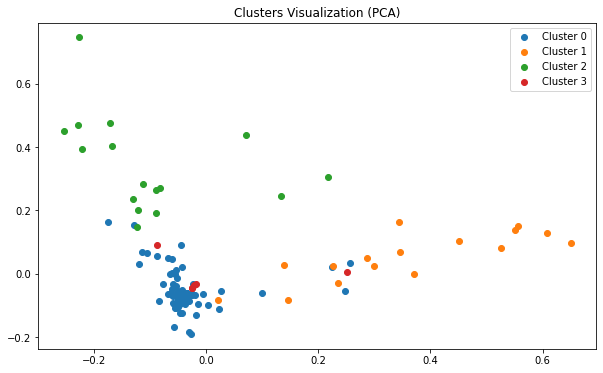

In [50]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


plt.figure(figsize=(10, 6))

for i in range(k):
    cluster_points = X_pca[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.title('Clusters Visualization (PCA)')
plt.legend()
plt.show()

Анализируя файл вывода и визуализацию становится очевидно, что анализ лишь по словам не имеет смысла. Для нормальной кластеризации нам необходимо учитывать не только используемую лексику, но и мелодию, сочетание слов, длину строк и отдельных слов. Например, если речь идет о поп музыке, то ее признаками будут короткая длина строк и слов, частое повторение одних и тех же слов и преобладание средних и низких частот. А например для металла это будут короткие строки, но при этом частое употребление длинных слов и наличие всех частот. 

In [47]:
df['Метка_кластера'] = kmeans.labels_
print(df)

                                               Отрывок        Жанр  cluster  \
0    right now im shameless screaming my lungs out ...         pop        3   
1            i live for the applause applause applause         pop        3   
2                     i can smell your scent for miles         pop        3   
3                           oh shes sweet but a psycho         pop        3   
4                                 im a mess im a loser         pop        3   
..                                                 ...         ...      ...   
147                 hear the drum pounding out of time  alter_rock        2   
148  im coming out of my cage and ive been doing ju...  alter_rock        2   
149  and this is how you remind me of what i really am  alter_rock        2   
150  grab a brush and put a little makeup you wante...  alter_rock        2   
151          i know now this is who i really am inside  alter_rock        2   

     Метка_кластера  
0                 1  
1      

In [41]:
df.to_csv('path.csv', index=False)